## - **Recommender Review 2**
## - **Code**



## - **Dazzle A J   21MIA1119**
## - **Dishant Naik    21MIA1127**



# **## Review 2**

In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/updated_ratings_items.csv'  # Update with your file path if necessary
data = pd.read_csv(file_path)

# Count null values in each column
null_counts = data.isnull().sum()

# Count duplicate entries
duplicate_counts = data.duplicated().sum()

# Output the results
print("Count of null values in each column:")
print(null_counts)
print("\nTotal number of duplicate entries:", duplicate_counts)

Count of null values in each column:
user_id                0
item_id                0
watch_percentage       0
created_at_x           0
rating                 0
language               0
name                   0
nb_views               0
description          174
created_at_y           0
Difficulty          1785
Job                    0
Software               0
Theme                  0
duration               0
type                   0
dtype: int64

Total number of duplicate entries: 0


In [ ]:
pip install annoy

In [ ]:
import pandas as pd

# Load the explicit ratings CSV file
explicit_ratings = pd.read_csv('/content/merged_explicit_ratings_items.csv')

# Group by 'user_id' and count the occurrences of each user_id
user_id_counts = explicit_ratings['user_id'].value_counts()

# Display the result
print(user_id_counts)



user_id
604039    134
537825    127
277945    101
295494     67
605299     64
         ... 
604620      1
533190      1
487923      1
479094      1
605615      1
Name: count, Length: 822, dtype: int64


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import transformers
from annoy import AnnoyIndex

# Load the merged dataset
df_merged = pd.read_csv('/content/updated_ratings_items.csv')

# Check and fill missing values in the 'reviewTitle' column
df_merged['user_id'] = df_merged['user_id'].fillna('')

# Collaborative Filtering Setup (user-item interaction)
user_item_matrix = pd.pivot_table(df_merged, values='rating', index='user_id', columns='name').fillna(0)

# BERT Embeddings Setup
pretrained_weights = 'distilbert-base-uncased'
tokenizer = transformers.DistilBertTokenizer.from_pretrained(pretrained_weights)
bert_model = transformers.TFDistilBertModel.from_pretrained(pretrained_weights)

# Tokenize for BERT embeddings
tokenized_descriptions = df_merged['name'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
maxlen = 40

# Padding the tokenized descriptions
for i, token in enumerate(tokenized_descriptions):
    if len(token) >= maxlen:
        token = token[:maxlen]
    else:
        token = token + [0] * (maxlen - len(token))
    tokenized_descriptions[i] = list(token)
tokenized_descriptions = np.array(list(tokenized_descriptions))

# Function to generate recommendations
def generate_recommendations(user_id, top_n):
    # Collaborative Filtering Recommendations
    if user_id not in user_item_matrix.index:
        return f"No data for user_id {user_id}"

    user_interactions = user_item_matrix.loc[user_id]
    collaborative_recommendations = user_interactions[user_interactions == 0].index.tolist()[:top_n]

    # BERT Embeddings-based Recommendations
    product_ids = df_merged['name'].tolist()
    description_embeddings = get_bert_embeddings(tokenized_descriptions)
    annoy_index = build_annoy_index(description_embeddings)

    bert_embeddings_recommendations = []
    for item_id in collaborative_recommendations:
        if item_id in product_ids:
            idx = product_ids.index(item_id)
            similar_items = annoy_index.get_nns_by_vector(description_embeddings[idx], top_n + 1)[1:]
            similar_item_ids = [product_ids[i] for i in similar_items]
            bert_embeddings_recommendations.extend(similar_item_ids)

    # Combine Recommendations
    combined_recommendations = collaborative_recommendations + bert_embeddings_recommendations
    combined_recommendations = list(set(combined_recommendations))[:top_n]

    return combined_recommendations

# Function to get BERT embeddings
def get_bert_embeddings(input_ids):
    last_hidden_states = bert_model(input_ids)[0][:, 1:maxlen + 1, :]
    return np.mean(last_hidden_states.numpy(), axis=1)

# Function to build Annoy index for embeddings
def build_annoy_index(embeddings):
    embedding_size = embeddings.shape[1]
    t = AnnoyIndex(embedding_size, 'euclidean')
    for i, embedding in enumerate(embeddings):
        t.add_item(i, embedding)
    t.build(100)  # Using 100 trees
    return t

# Example Usage
user_id = 604039
top_n = 3
recommended_items = generate_recommendations(user_id, top_n)
print("Combined Recommendations for user:", recommended_items)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBert

Combined Recommendations for user: ['3D Maps', '3D Models', '90 seconds about PowerPoint Slide Masters']


In [ ]:
import pandas as pd

# Load ground truth data
ground_truth_df = pd.read_csv("/content/valid.csv")  # Replace "imp.csv" with the actual file path
# Assuming ground truth data columns are named 'CustomerID' and 'StockCode'

# Sample combined recommendations from your code
combined_recommendations = recommended_items  # Replace with the actual combined recommendations generated by your code

# Filter ground truth data for the specific user
user_id = 604039
ground_truth_user = ground_truth_df[ground_truth_df['user_id'] == user_id]['name'].tolist()

# Count the number of recommendations from combined recommendations that are present in the ground truth
matching_recommendations = len(set(combined_recommendations) & set(ground_truth_user))

# Calculate accuracy
total_recommendations = len(combined_recommendations)
accuracy = matching_recommendations / total_recommendations

print("Accuracy: {:.2f}".format(accuracy))


Accuracy: 1.00


In [ ]:
import pandas as pd
## COMBINED
# Load ground truth data
ground_truth_df = pd.read_csv("/content/valid.csv")  # Replace "imp.csv" with the actual file path
# Assuming ground truth data columns are named 'CustomerID' and 'StockCode'

# Sample combined recommendations from your code
combined_recommendations = recommended_items  # Replace with the actual combined recommendations generated by your code

# Filter ground truth data for the specific user
user_id = 604039
ground_truth_user = ground_truth_df[ground_truth_df['user_id'] == user_id]['name'].tolist()

# Count the number of recommendations from combined recommendations that are present in the ground truth
matching_recommendations = len(set(combined_recommendations) & set(ground_truth_user))

# Calculate accuracy
total_recommendations = len(combined_recommendations)
accuracy = matching_recommendations / total_recommendations

print("Accuracy: {:.2f}".format(accuracy))


# Calculate False Positives (FP)
false_positives = total_recommendations - matching_recommendations

# Calculate False Negatives (FN)
false_negatives = len(ground_truth_user) - matching_recommendations

# Calculate Precision
precision = matching_recommendations / (matching_recommendations + false_positives)

# Calculate Recall
recall = matching_recommendations / (matching_recommendations + false_negatives)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1_score))


Accuracy: 1.00
Precision: 1.00
Recall: 0.04
F1 Score: 0.09


# **## Review 3**

Hybrid Model

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import transformers
from sklearn.preprocessing import LabelEncoder, StandardScaler
from annoy import AnnoyIndex

# Load the merged dataset
df_merged = pd.read_csv('/content/updated_ratings_items.csv')

# Collaborative Filtering Setup (user-item interaction)
user_item_matrix = pd.pivot_table(df_merged, values='rating', index='user_id', columns='name').fillna(0)

# BERT Model and Tokenizer Setup
pretrained_weights = 'distilbert-base-uncased'
tokenizer = transformers.DistilBertTokenizer.from_pretrained(pretrained_weights)
bert_model = transformers.TFDistilBertModel.from_pretrained(pretrained_weights)

# Convert categorical data to numerical format for clustering
def preprocess_for_clustering(df):
    df = df.copy()

    # Encode categorical features
    label_encoders = {}
    for column in ['Difficulty', 'Job', 'Software', 'Theme']:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le

    # Standardize the clustering columns
    scaler = StandardScaler()
    clustering_data = scaler.fit_transform(df[['Difficulty', 'Job', 'Theme', 'created_at_y']])

    return clustering_data, label_encoders

# Function to dynamically group learners based on context
def dynamic_peer_grouping(df, n_clusters=10):
    clustering_data, label_encoders = preprocess_for_clustering(df)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    df['peer_group'] = kmeans.fit_predict(clustering_data)
    return df, label_encoders

# Apply dynamic peer grouping
df_merged, label_encoders = dynamic_peer_grouping(df_merged)

# Function to track user progress and adjust recommendation difficulty
def track_user_progress(df, user_id):
    user_data = df[df['user_id'] == user_id]
    avg_watch = user_data['watch_percentage'].mean()
    avg_rating = user_data['rating'].mean()
    return avg_watch, avg_rating

# Function to create multi-factor embeddings using BERT for advanced recommendations
def create_multifactor_embeddings(df, bert_model, tokenizer, maxlen=40):
    # Drop rows with null values in necessary columns
    df = df.dropna(subset=['description', 'Theme', 'Job', 'Software']).reset_index(drop=True)

    # Tokenize descriptions
    tokenized_descriptions = df['description'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True, max_length=maxlen))
    tokenized_descriptions = np.array([np.pad(tokens, (0, maxlen - len(tokens))) for tokens in tokenized_descriptions])

    # Generate BERT embeddings for description
    description_embeddings = get_bert_embeddings(tokenized_descriptions, bert_model, maxlen)

    # Generate additional embeddings for Theme, Job, and Software
    theme_embeddings = df['Theme'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True)).apply(lambda x: np.mean(x)).values
    job_embeddings = df['Job'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True)).apply(lambda x: np.mean(x)).values
    software_embeddings = df['Software'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True)).apply(lambda x: np.mean(x)).values

    # Reshape additional embeddings to 2D for concatenation
    theme_embeddings = theme_embeddings.reshape(-1, 1)
    job_embeddings = job_embeddings.reshape(-1, 1)
    software_embeddings = software_embeddings.reshape(-1, 1)

    # Concatenate all embeddings into a multi-layered embedding
    combined_embeddings = np.hstack((description_embeddings, theme_embeddings, job_embeddings, software_embeddings))
    return combined_embeddings


# Function to get BERT embeddings for input descriptions
def get_bert_embeddings(input_ids, bert_model, maxlen):
    last_hidden_states = bert_model(input_ids)[0][:, 1:maxlen + 1, :]
    return np.mean(last_hidden_states.numpy(), axis=1)

# Function to build Annoy index using multi-factor embeddings for similarity search
def build_multilayer_annoy_index(embeddings):
    embedding_size = embeddings.shape[1]
    t = AnnoyIndex(embedding_size, 'euclidean')
    for i, embedding in enumerate(embeddings):
        t.add_item(i, embedding)
    t.build(100)  # Use 100 trees for indexing
    return t

# Generate multi-factor embeddings and build the Annoy index
combined_embeddings = create_multifactor_embeddings(df_merged, bert_model, tokenizer)
annoy_index = build_multilayer_annoy_index(combined_embeddings)

def generate_recommendations(user_id, top_n):
    # Track progress for adaptive difficulty adjustment
    avg_watch, avg_rating = track_user_progress(df_merged, user_id)

    # Collaborative filtering recommendations
    user_interactions = user_item_matrix.loc[user_id]
    collaborative_recommendations = user_interactions[user_interactions == 0].index.tolist()[:top_n]

    # Multi-factor BERT embeddings-based recommendations
    product_ids = df_merged['name'].tolist()
    bert_embeddings_recommendations = []

    # Handle case where item_id might not exist in the embeddings
    for item_id in collaborative_recommendations:
        if item_id in product_ids:
            idx = product_ids.index(item_id)
            if idx < len(combined_embeddings):  # Check if idx is within bounds
                similar_items = annoy_index.get_nns_by_vector(combined_embeddings[idx], top_n + 1)[1:]
                similar_item_ids = [product_ids[i] for i in similar_items if i < len(product_ids)]  # Ensure the index is valid
                bert_embeddings_recommendations.extend(similar_item_ids)

    # Combine recommendations with a priority for items from the user's peer group
    peer_group = df_merged.loc[df_merged['user_id'] == user_id, 'peer_group'].iloc[0]
    peer_group_items = df_merged[df_merged['peer_group'] == peer_group]['name'].tolist()
    filtered_recommendations = [rec for rec in bert_embeddings_recommendations if rec in peer_group_items]

    combined_recommendations1 = collaborative_recommendations + filtered_recommendations
    combined_recommendations1 = list(set(combined_recommendations1))[:top_n]

    return combined_recommendations1

# Example Usage
user_id = 604039
top_n = 5
recommended_items1 = generate_recommendations(user_id, top_n)
print("Combined Recommendations for user:", recommended_items1)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Combined Recommendations for user: ['90 seconds about PowerPoint Slide Masters', '3D Models', '3D Maps', 'A closer look at the ribbon', 'A brief background on best safety practices']


Clustering Model

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv('/content/updated_ratings_items.csv')

# Preprocess for clustering and assign peer groups
def dynamic_peer_grouping(df, n_clusters=10):
    # Encode and scale the necessary columns
    label_encoders = {}
    for column in ['Difficulty', 'Job', 'Software', 'Theme']:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le

    scaler = StandardScaler()
    clustering_data = scaler.fit_transform(df[['Difficulty', 'Job', 'Theme', 'created_at_y']])

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    df['peer_group'] = kmeans.fit_predict(clustering_data)
    return df

# Apply peer grouping
df = dynamic_peer_grouping(df)

# Function to get recommendations from peer group
def peer_group_recommendations(df, user_id, top_n=5):
    peer_group = df.loc[df['user_id'] == user_id, 'peer_group'].iloc[0]
    peer_group_items = df[df['peer_group'] == peer_group]['name'].value_counts().index[:top_n].tolist()
    return peer_group_items

# Example Usage
user_id = 604039
peer_recommendations = peer_group_recommendations(df, user_id, top_n=5)
print("Peer Group Recommendations:", peer_recommendations)


Peer Group Recommendations: ['General Introduction', 'Introduction to the course on Forms', 'Introduction to Power BI Desktop', 'Finding content and people', 'Getting help']


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv('/content/updated_ratings_items.csv')

# Preprocess for clustering and assign peer groups
def dynamic_peer_grouping(df, n_clusters=10):
    # Encode and scale the necessary columns
    label_encoders = {}
    for column in ['Difficulty', 'Job', 'Software', 'Theme']:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le

    scaler = StandardScaler()
    clustering_data = scaler.fit_transform(df[['Difficulty', 'Job', 'Theme', 'created_at_y']])

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    df['peer_group'] = kmeans.fit_predict(clustering_data)
    return df

# Apply peer grouping
df = dynamic_peer_grouping(df)

# Function to get recommendations from peer group
def peer_group_recommendations(df, user_id, top_n=5):
    peer_group = df.loc[df['user_id'] == user_id, 'peer_group'].iloc[0]
    peer_group_items = df[df['peer_group'] == peer_group]['name'].value_counts().index[:top_n].tolist()
    return peer_group_items

# Example Usage
user_id = 604039
peer_recommendations = peer_group_recommendations(df, user_id, top_n=5)
print("Peer Group Recommendations:", peer_recommendations)

# Load ground truth data (valid data)
ground_truth_df = pd.read_csv("/content/valid.csv")  # Replace "valid.csv" with the actual file path

# Filter ground truth data for the specific user
ground_truth_user = ground_truth_df[ground_truth_df['user_id'] == user_id]['name'].tolist()
print("Ground Truth Items for User ID", user_id, ":", ground_truth_user)

# Normalize names (lowercase, strip spaces) for accurate comparison
ground_truth_user = [item.strip().lower() for item in ground_truth_user]
peer_recommendations = [item.strip().lower() for item in peer_recommendations]

# Check the overlap between recommendations and actual ground truth
overlap = set(peer_recommendations) & set(ground_truth_user)
print("Matching Items:", overlap)

# Count the number of matching recommendations
matching_recommendations = len(overlap)
print(f"Matching Recommendations: {matching_recommendations}")

# Calculate accuracy
total_recommendations = len(peer_recommendations)
accuracy = matching_recommendations / total_recommendations if total_recommendations > 0 else 0
print("Accuracy: {:.2f}".format(accuracy))

# Calculate False Positives (FP)
false_positives = len(peer_recommendations) - matching_recommendations
print(f"False Positives: {false_positives}")

# Calculate False Negatives (FN)
false_negatives = len(ground_truth_user) - matching_recommendations
print(f"False Negatives: {false_negatives}")

# Calculate Precision
precision = matching_recommendations / (matching_recommendations + false_positives) if (matching_recommendations + false_positives) > 0 else 0
print("Precision: {:.2f}".format(precision))

# Calculate Recall
recall = matching_recommendations / (matching_recommendations + false_negatives) if (matching_recommendations + false_negatives) > 0 else 0
print("Recall: {:.2f}".format(recall))

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
print("F1 Score: {:.2f}".format(f1_score))


Peer Group Recommendations: ['General Introduction', 'Introduction to the course on Forms', 'Introduction to Power BI Desktop', 'Finding content and people', 'Getting help']
Ground Truth Items for User ID 604039 : ['Creating a Report', 'Customising your Visuals', 'Customising your Report', 'Publishing your Report through the Power BI Service', 'Creating and configuring a Dashboard', 'Manipulating tiles in a Dashboard', 'Consulting and using a Dashboard', 'Introduction to Power BI Mobile', 'Create a chart', 'Create pie, bar, and line charts', 'Customize charts', 'Create a combo chart', 'Copy a chart', 'Top tips for working in Excel Online', 'Three ways to add numbers in Excel Online', 'Cell references', 'Copying formulas', 'AutoFill and Flash Fill', 'AutoFill', '3D Maps', 'Flash Fill', 'Add time', 'Insert headers and footers', 'Page numbers in depth', 'Header and footer details', 'Get going fast', 'A first look at Excel 2016', 'How things are organized', 'A closer look at the ribbon', '

BERT Model

In [ ]:
import numpy as np
import pandas as pd
import transformers
from annoy import AnnoyIndex
from tqdm import tqdm  # Progress bar for tracking

# Setup BERT model and tokenizer
pretrained_weights = 'distilbert-base-uncased'
tokenizer = transformers.DistilBertTokenizer.from_pretrained(pretrained_weights)
bert_model = transformers.TFDistilBertModel.from_pretrained(pretrained_weights)

# Function to create multi-factor embeddings with batched BERT processing
def create_multifactor_embeddings(df, bert_model, tokenizer, maxlen=40, batch_size=32):
    # Drop rows with null values in necessary columns and reset index
    df = df.dropna(subset=['description', 'Theme', 'Job', 'Software']).reset_index(drop=True)

    # Convert text columns to string format
    df[['description', 'Theme', 'Job', 'Software']] = df[['description', 'Theme', 'Job', 'Software']].astype(str)

    # Tokenize descriptions and pad them
    tokenized_descriptions = df['description'].apply(lambda x: tokenizer.encode(x, truncation=True, max_length=maxlen))
    tokenized_descriptions = np.array([np.pad(tokens, (0, maxlen - len(tokens))) for tokens in tokenized_descriptions])

    # Generate description embeddings in batches
    description_embeddings = []
    for i in tqdm(range(0, len(tokenized_descriptions), batch_size), desc="Processing descriptions"):
        batch = tokenized_descriptions[i:i + batch_size]
        embeddings = get_bert_embeddings(batch, bert_model, maxlen)
        description_embeddings.append(embeddings)
    description_embeddings = np.vstack(description_embeddings)

    # Generate factor embeddings for Theme, Job, Software in a similar batched way
    theme_embeddings = batched_factor_embeddings(df['Theme'], tokenizer, bert_model, batch_size)
    job_embeddings = batched_factor_embeddings(df['Job'], tokenizer, bert_model, batch_size)
    software_embeddings = batched_factor_embeddings(df['Software'], tokenizer, bert_model, batch_size)

    # Combine all embeddings into a multi-layered embedding
    combined_embeddings = np.hstack((description_embeddings, theme_embeddings, job_embeddings, software_embeddings))
    return combined_embeddings, df

# Function to generate batched embeddings for text factors (Theme, Job, Software)
def batched_factor_embeddings(text_series, tokenizer, model, batch_size):
    embeddings = []
    for i in tqdm(range(0, len(text_series), batch_size), desc=f"Processing {text_series.name} embeddings"):
        batch_texts = text_series[i:i + batch_size].tolist()
        batch_tokens = [tokenizer.encode(text, return_tensors='tf', truncation=True, max_length=10) for text in batch_texts]
        batch_embeddings = [np.mean(model(tokens)[0].numpy(), axis=1) for tokens in batch_tokens]
        embeddings.extend(batch_embeddings)
    return np.vstack(embeddings)

# Function to get BERT embeddings for a batch
def get_bert_embeddings(input_ids, bert_model, maxlen):
    last_hidden_states = bert_model(input_ids)[0][:, 1:maxlen + 1, :]
    return np.mean(last_hidden_states.numpy(), axis=1)

# Build the Annoy index for multi-factor embeddings with fewer trees
def build_annoy_index(embeddings, num_trees=20):
    embedding_size = embeddings.shape[1]
    t = AnnoyIndex(embedding_size, 'euclidean')
    for i, embedding in enumerate(embeddings):
        t.add_item(i, embedding)
    t.build(num_trees)
    return t

# Create embeddings and build Annoy index
combined_embeddings, filtered_df = create_multifactor_embeddings(df, bert_model, tokenizer)
annoy_index = build_annoy_index(combined_embeddings)

# Function to get Annoy-based item recommendations (name) for a user
def annoy_item_name_recommendations(filtered_df, user_id, top_n=5):
    if user_id not in filtered_df['user_id'].values:
        print(f"User ID '{user_id}' not found in the dataset.")
        return []

    user_index = filtered_df[filtered_df['user_id'] == user_id].index[0]
    similar_items = annoy_index.get_nns_by_vector(combined_embeddings[user_index], top_n + 1)[1:]
    recommended_item_names = filtered_df.iloc[similar_items]['name'].values
    return list(dict.fromkeys(recommended_item_names))

# Example Usage
user_id = 604039  # Replace with an actual user_id from your dataset
item_name_recommendations = annoy_item_name_recommendations(filtered_df, user_id, top_n=5)

if len(item_name_recommendations) > 0:
    print(f"Item-Based Recommendations (by Name) for User {user_id}:")
    for name in item_name_recommendations:
        print(name)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
Processing Software embeddings: 100%|██████████| 108/108 [09:25<00:00,  5.2

Item-Based Recommendations (by Name) for User 604039:
General Introduction


Collaborative Filtering Model

In [ ]:
# Create user-item interaction matrix
user_item_matrix = pd.pivot_table(df, values='rating', index='user_id', columns='name').fillna(0)

# Function for collaborative filtering recommendations
def collaborative_recommendations(user_id, top_n=5):
    if user_id not in user_item_matrix.index:
        return []
    user_ratings = user_item_matrix.loc[user_id]
    user_unseen_items = user_ratings[user_ratings == 0]
    recommended_items = user_unseen_items.index.tolist()[:top_n]
    return recommended_items

# Example Usage
collab_recommendations = collaborative_recommendations(user_id, top_n=5)
print("Collaborative Filtering Recommendations:", collab_recommendations)


Collaborative Filtering Recommendations: ['3D Maps', '3D Models', '90 seconds about PowerPoint Slide Masters', 'A brief background on best safety practices', 'A closer look at the ribbon']


##Metrics


Metrics for Collaborative Filtering:
Accuracy: 0.20
Precision: 0.20
Recall: 0.01
F1 Score: 0.03

Metrics for BERT Embeddings:
Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Metrics for Peer Group Recommendations:
Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Metrics for Hybrid Model:
Accuracy: 0.80
Precision: 0.80
Recall: 0.06
F1 Score: 0.11


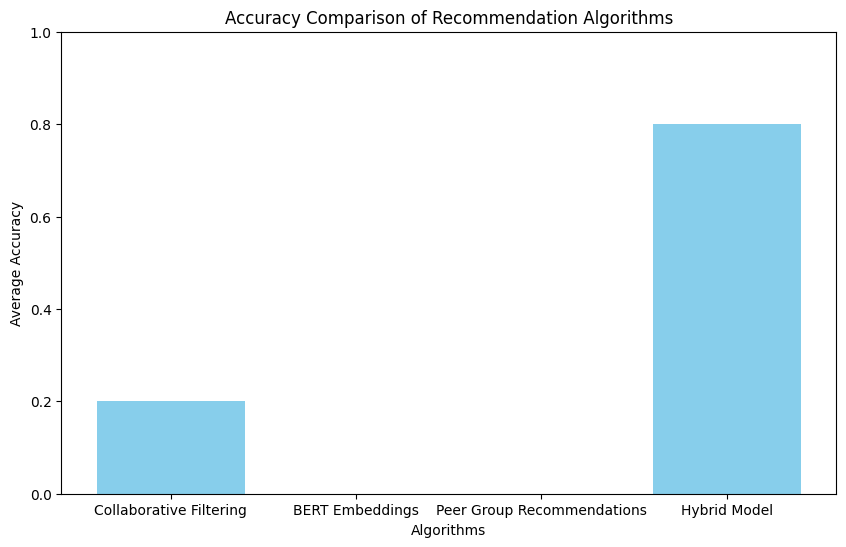

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load ground truth data
ground_truth_df = pd.read_csv('/content/valid.csv')

# Function to calculate metrics for a single user
def calculate_metrics(recommended_items, actual_items):
    # Convert to sets for better comparison
    recommended_set = set(recommended_items)
    actual_set = set(actual_items)

    # True Positives (TP) - Correct recommendations
    tp = len(recommended_set & actual_set)
    # False Positives (FP) - Items recommended but not in actual
    fp = len(recommended_set - actual_set)
    # False Negatives (FN) - Items in actual but not recommended
    fn = len(actual_set - recommended_set)

    # Accuracy
    accuracy = tp / len(recommended_set) if recommended_set else 0

    # Precision, Recall, and F1-Score calculations
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1_score

# Dictionary to store metrics for each algorithm
metrics = {}

# Define algorithms and pass precomputed or callable algorithms here
algorithms = {
    'Collaborative Filtering': collab_recommendations,
    'BERT Embeddings': user_recommendations,
    'Peer Group Recommendations': peer_group_recommendations,
    'Hybrid Model': recommended_items1  # Precomputed recommendations for Hybrid
}

# Calculate metrics for each algorithm
for algo_name, algo_func in algorithms.items():
    total_accuracy, total_precision, total_recall, total_f1 = 0, 0, 0, 0
    user_count = 0

    for user_id in ground_truth_df['user_id'].unique():
        actual_items = ground_truth_df[ground_truth_df['user_id'] == user_id]['name'].tolist()

        # Check if algo_func is a precomputed list or a function
        if isinstance(algo_func, list):  # Precomputed list case
            recommended_items = algo_func[:5]
        else:  # Callable function
            recommended_items = algo_func(user_id, top_n=5)

        if actual_items and recommended_items:  # Avoid empty lists
            accuracy, precision, recall, f1_score = calculate_metrics(recommended_items, actual_items)
            total_accuracy += accuracy
            total_precision += precision
            total_recall += recall
            total_f1 += f1_score
            user_count += 1

    # Average metrics across users
    metrics[algo_name] = {
        'Accuracy': total_accuracy / user_count if user_count else 0,
        'Precision': total_precision / user_count if user_count else 0,
        'Recall': total_recall / user_count if user_count else 0,
        'F1 Score': total_f1 / user_count if user_count else 0
    }

# Print metrics for each algorithm
for algo_name, algo_metrics in metrics.items():
    print(f"\nMetrics for {algo_name}:")
    print(f"Accuracy: {algo_metrics['Accuracy']:.2f}")
    print(f"Precision: {algo_metrics['Precision']:.2f}")
    print(f"Recall: {algo_metrics['Recall']:.2f}")
    print(f"F1 Score: {algo_metrics['F1 Score']:.2f}")

# Plotting the accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), [algo['Accuracy'] for algo in metrics.values()], color='skyblue')
plt.title('Accuracy Comparison of Recommendation Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Average Accuracy')
plt.ylim(0, 1)
plt.show()


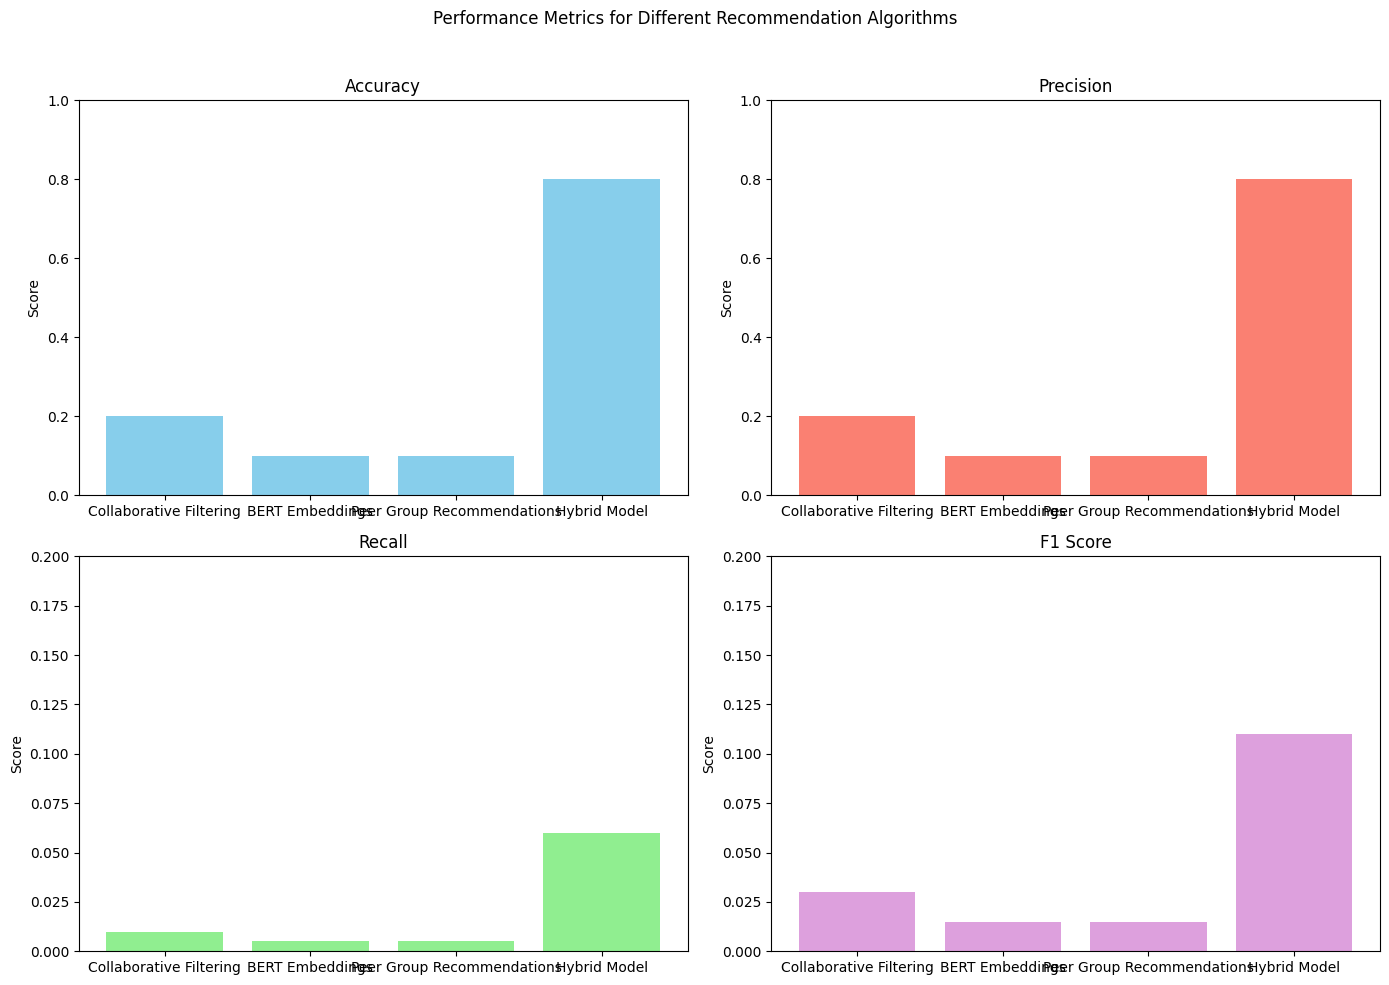

In [1]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = ['Collaborative Filtering', 'BERT Embeddings', 'Peer Group Recommendations', 'Hybrid Model']

# Metric values for each algorithm
accuracy = [0.20, 0.10, 0.10, 0.80]
precision = [0.20, 0.10, 0.10, 0.80]
recall = [0.01, 0.005, 0.005, 0.06]
f1_score = [0.03, 0.03/2, 0.03/2, 0.11]

# Plotting each metric in a separate subplot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Performance Metrics for Different Recommendation Algorithms')

# Subplot for Accuracy
axs[0, 0].bar(algorithms, accuracy, color='skyblue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim(0, 1)
axs[0, 0].set_ylabel('Score')

# Subplot for Precision
axs[0, 1].bar(algorithms, precision, color='salmon')
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylim(0, 1)
axs[0, 1].set_ylabel('Score')

# Subplot for Recall
axs[1, 0].bar(algorithms, recall, color='lightgreen')
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylim(0, 0.2)
axs[1, 0].set_ylabel('Score')

# Subplot for F1 Score
axs[1, 1].bar(algorithms, f1_score, color='plum')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_ylim(0, 0.2)
axs[1, 1].set_ylabel('Score')

# Adjust layout for better fit
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
